## Predicción con red neuronal MLP (Multi_Layer Percepton)

In [ ]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

import joblib
import os

import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from keras import backend as K



In [19]:
# Ruta a los archivos
train_path = "../data_sample/customer_churn_dataset-training-master.csv"
test_path = "../data_sample/customer_churn_dataset-testing-master.csv"

# Cargar datasets
df_train = pd.read_csv(train_path)
df_test = pd.read_csv(test_path)


In [20]:
# Eliminar filas con valores nulos
df_train = df_train.dropna()
df_test = df_test.dropna()

# Asegurar que la variable objetivo sea tipo entero
df_train['Churn'] = df_train['Churn'].astype(int)
df_test['Churn'] = df_test['Churn'].astype(int)


In [21]:
# Eliminamos columnas que no nos sirven para predecir, como CustomerID
X = df_train.drop(['CustomerID', 'Churn'], axis=1)
y = df_train['Churn']

In [22]:
# One-Hot Encoding para convertir en numéricas
X = pd.get_dummies(X, columns=['Gender', 'Subscription Type', 'Contract Length'], drop_first=True)

In [23]:
# Train/Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [24]:
# Escalamos
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)

X_test_scaled = scaler.transform(X_test)

In [25]:
# Lista de columnas que podrían estar causando fuga de información
cols_fuga = ['Total Spend', 'Payment Delay', 'Last Interaction']

# Creamos una nueva copia del dataset sin esas columnas
X_clean = X.drop(cols_fuga, axis=1)

# Mantenemos la misma y
y_clean = y.copy()

# Dividimos de nuevo en train y validación
X_train_clean, X_test_clean, y_train_clean, y_test_clean = train_test_split(
    X_clean, y_clean, test_size=0.2, random_state=42, stratify=y_clean
)

# Escalado
scaler_clean = StandardScaler()
X_train_clean_scaled = scaler_clean.fit_transform(X_train_clean)
X_test_clean_scaled = scaler_clean.transform(X_test_clean)


In [31]:

# Definir el modelo
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_clean_scaled.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')  # Usa softmax si tienes más de 2 clases
])

# Compilar el modelo
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Callback EarlyStopping
early_stop = EarlyStopping(
    monitor='val_loss',     
    patience=5,              # Número de épocas sin mejora antes de parar
    restore_best_weights=True
)

# Entrenamiento
history = model.fit(
    X_train_clean_scaled,
    y_train_clean,
    epochs=50,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stop]
)

Epoch 1/50


c:\Users\iagog\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8817/8817 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step - accuracy: 0.9013 - loss: 0.2525 - val_accuracy: 0.9216 - val_loss: 0.2107
Epoch 2/50
8817/8817 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step - accuracy: 0.9247 - loss: 0.2044 - val_accuracy: 0.9267 - val_loss: 0.2011
Epoch 3/50
8817/8817 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step - accuracy: 0.9283 - loss: 0.1976 - val_accuracy: 0.9272 - val_loss: 0.1984
Epoch 4/50
8817/8817 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step - accuracy: 0.9290 - loss: 0.1965 - val_accuracy: 0.9296 - val_loss: 0.1946
Epoch 5/50
8817/8817 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step - accuracy: 0.9306 - loss: 0.1939 - val_accuracy: 0.9315 - val_loss: 0.1920
Epoch 6/50
8817/8817 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step - accuracy: 0.9311 - loss: 0.1942 - val_accuracy: 0.9307 - val_loss: 0.1941
Epoch 7/50
8817/8817 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step - accuracy: 0.9325 - loss: 0.1917 - val_accuracy: 0.9336 - val_loss: 0.1896
Epoch 8/50
8817/8817 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step - accuracy: 0.9339 - loss: 0.1893 - val_accu

In [33]:
# Evaluar el rendimiento del modelo
loss, accuracy = model.evaluate(X_train_clean_scaled, y_train_clean)

print(f"Loss: {loss}")
print(f"Accuracy: {accuracy}")


11021/11021 ━━━━━━━━━━━━━━━━━━━━ 8s 733us/step - accuracy: 0.9371 - loss: 0.1829
Loss: 0.1835770308971405
Accuracy: 0.9365573525428772


In [34]:
# Evaluar en el conjunto de datos de prueba
loss, accuracy = model.evaluate(X_test_clean_scaled, y_test_clean)
print(f"Loss: {loss}")
print(f"Accuracy: {accuracy}")


2756/2756 ━━━━━━━━━━━━━━━━━━━━ 2s 762us/step - accuracy: 0.9354 - loss: 0.1861
Loss: 0.1876244992017746
Accuracy: 0.9345106482505798


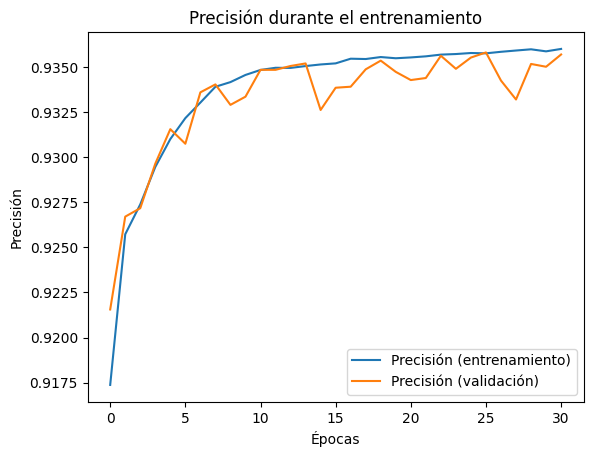

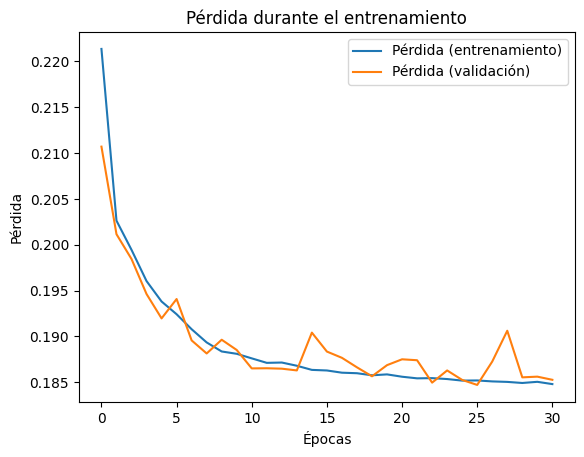

In [ ]:

# Graficar precisión
plt.plot(history.history['accuracy'], label='Precisión (entrenamiento)')
plt.plot(history.history['val_accuracy'], label='Precisión (validación)')
plt.title('Precisión durante el entrenamiento')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend(loc='lower right')
plt.show()

# Graficar pérdida
plt.plot(history.history['loss'], label='Pérdida (entrenamiento)')
plt.plot(history.history['val_loss'], label='Pérdida (validación)')
plt.title('Pérdida durante el entrenamiento')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend(loc='upper right')
plt.show()


In [36]:
# Guardar el modelo entrenado en la ruta deseada
model.save('../src/models/modelo_DL.h5')


In [45]:

# Datos del Cliente 1
new_data_3 = {
    'Age': 35,
    'Tenure': 6,
    'Usage Frequency': 3,
    'Support Calls': 2,
    'Gender_Male': 1,
    'Subscription Type_Premium': 0,
    'Subscription Type_Standard': 1,
    'Contract Length_Monthly': 0
}

# Obtener todas las columnas que espera el modelo (X_clean.columns)
columnas_modelo = X_clean.columns  # asegúrate de que X_clean esté definido

# Completar columnas faltantes con 0 automáticamente
input_cliente_3 = pd.DataFrame([{col: new_data_3.get(col, 0) for col in columnas_modelo}])

# Escalar los datos con scaler_clean
input_cliente_3_scaled = scaler_clean.transform(input_cliente_3)

# Hacer la predicción
pred_3 = model.predict(input_cliente_3_scaled)

# Interpretar la salida
if pred_3[0][0] > 0.5:
    print("Predicción para el Cliente 3: El cliente probablemente hará churn (se irá).")
else:
    print("Predicción para el Cliente 3: El cliente probablemente no hará churn (se quedará).")




1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
Predicción para el Cliente 3: El cliente probablemente no hará churn (se quedará).


In [46]:

# Datos del cliente 2
new_data_2 = [[40, 16, 1, 0, 0, 1, 0, 1]]  # Edad, Tenure, Usage Frequency, Support Calls, Gender_Male, Subscription Type_Premium, Subscription Type_Standard, Contract Length_Monthly

# Columnas que el modelo espera (de X_clean)
columnas_modelo = X_clean.columns  # Esto lo obtienes directamente del DataFrame usado para entrenar

# Datos como diccionario parcial (solo las columnas relevantes)
partial_input = {
    'Age': 40,
    'Tenure': 16,
    'Usage Frequency': 1,
    'Support Calls': 0,
    'Gender_Male': 0,
    'Subscription Type_Premium': 1,
    'Subscription Type_Standard': 0,
    'Contract Length_Monthly': 1
}

# Completar con 0 todas las columnas faltantes automáticamente
input_completo = pd.DataFrame([{col: partial_input.get(col, 0) for col in columnas_modelo}])

# Escalar
input_scaled = scaler_clean.transform(input_completo)

# Predecir
pred = model.predict(input_scaled)

# Interpretar resultado
if pred[0][0] > 0.5:
    print("Predicción para el Cliente 2: El cliente probablemente hará churn (se irá).")
else:
    print("Predicción para el Cliente 2: El cliente probablemente no hará churn (se quedará).")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Predicción para el Cliente 2: El cliente probablemente hará churn (se irá).
